<a href="https://colab.research.google.com/github/AjAyrAo43/project/blob/main/DOG_VS_CAT_IMAGE_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [34]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

tongpython_cat_and_dog_path = kagglehub.dataset_download('tongpython/cat-and-dog')
# ajayrao43_catimage_path = kagglehub.dataset_download('ajayrao43/catimage')
# ajayrao43_dog_dataset_path = kagglehub.dataset_download('ajayrao43/dog-dataset')
# ajayrao43_dog_dataset_2_path = kagglehub.dataset_download('ajayrao43/dog-dataset-2')

print('Data source import complete.')


Using Colab cache for faster access to the 'cat-and-dog' dataset.
Data source import complete.


In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense ,Conv2D,Flatten,MaxPooling2D,BatchNormalization , Dropout

In [37]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/cat-and-dog/training_set/training_set',
    labels='inferred',
    label_mode='int',
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=123
)
val_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/cat-and-dog/test_set/test_set',
    labels='inferred',
    label_mode='int',
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=123
)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 2023 files belonging to 2 classes.
Using 404 files for validation.


In [38]:
#Normalize

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_data = train_data.map(process)
val_data = val_data.map(process)

In [39]:
# create cnn model

model = Sequential()

model.add(Conv2D(32,kernel_size =(3,3),padding='valid',activation='relu',input_shape =(128,128,3) ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size =(3,3),padding='valid',activation='relu',input_shape =(128,128,3) ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size =(3,3),padding='valid',activation='relu',input_shape =(128,128,3) ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,857 (12.64 MB)

 Trainable params: 3,313,409 (12.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
history=model.fit(train_data,epochs=10,validation_data=val_data)
history

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.5605 - loss: 1.1603 - val_accuracy: 0.5198 - val_loss: 0.9769
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.6225 - loss: 0.6505 - val_accuracy: 0.6386 - val_loss: 0.6557
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7133 - loss: 0.5567 - val_accuracy: 0.6832 - val_loss: 0.5932
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.7606 - loss: 0.4937 - val_accuracy: 0.6980 - val_loss: 0.6493
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.8040 - loss: 0.4360 - val_accuracy: 0.7450 - val_loss: 0.6246
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8418 - loss: 0.3542 - val_accuracy: 0.7302 - val_loss: 0.6226
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.8839 - loss: 0.2725 - val_accuracy: 0.7450 - val_loss: 0.6747
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9108 - loss: 0.2211 - val_ac

In [43]:
import cv2

 import cv2

In [44]:
test_img=cv2.imread('/content/pexels-pixabay-45201.jpg')

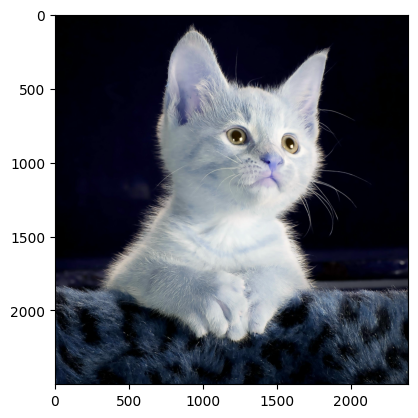

In [45]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [46]:
test_img.shape

(2500, 2392, 3)

In [47]:
test_img=cv2.resize(test_img,(128,128))


In [48]:
test_input=test_img.reshape((1,128,128,3))

In [49]:

test_input = test_input.astype('float32') / 255.0 # Normalize the image
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


array([[0.00090848]], dtype=float32)

In [50]:
test_img=cv2.imread('/content/premium_photo-1666777247416-ee7a95235559.jpeg')

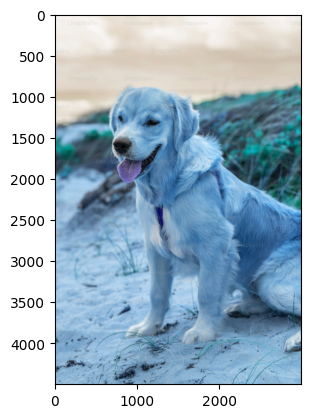

In [51]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [52]:
test_img=cv2.resize(test_img,(128,128))


In [53]:
test_input=test_img.reshape((1,128,128,3))

In [54]:

test_input = test_input.astype('float32') / 255.0 # Normalize the image
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.9991211]], dtype=float32)